# ECES 681 PROJECT: SRCNN: Image Super Resolution Using Deep Convolution Neural Network  
Group Members :  
Urvishkumar Bharti #ID - 14598391  

Vikram Shahpur  #ID - 14597876

Soham Jirge #ID - 14596514


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code first constructs the full path to the directory specified by google_drive_path, prints its contents, and then adds the full path to the Python path so that you can import Python files from that directory.

In [3]:
import os
import sys

google_drive_path = "CV/Project_SR"
google_drive_path = os.path.join("drive", "My Drive", "CV/Project_SR")
print(os.listdir(google_drive_path))

#add to sys so we can import python files
sys.path.append(google_drive_path)

['__pycache__', 'ground_truth', '3051crop_weight_200.h5', '.ipynb_checkpoints', 'Set5', 'Set14', 'LR_Images', 'srcnn_model.h5', 'img_resize.py', 'img_matrix.py', 'prepare_data.py', 'srcnn_model.py', 'SRCNN.ipynb', 'Set5_LR_Images_Test', 'Set14_LR_Images_Test']


#Introduction:
### Super-Resolution Convolutional Neural Network (SRCNN):

The Super-Resolution Convolutional Neural Network (SRCNN) is a pioneering deep learning model developed for single-image super-resolution. It was proposed by Chao Dong, Chen Change Loy, Kaiming He, and Xiaoou Tang in their paper titled "Image Super-Resolution Using Deep Convolutional Networks" in 2014.

#Key components:
1. **Patch Extraction and Representation**: Initially, low-resolution image patches are extracted and represented as high-dimensional feature vectors.
2. **Non-linear Mapping**: These feature vectors undergo non-linear mapping through a convolutional neural network (CNN). This CNN consists of multiple layers of convolution, each followed by a ReLU activation function.
3. **Reconstruction**: The mapped high-dimensional feature vectors are reconstructed to obtain the high-resolution image.

#Advantages:
- SRCNN was one of the early successful attempts at utilizing deep learning for single-image super-resolution.
- It showed significant improvements over traditional interpolation-based methods in terms of perceptual quality metrics like Peak Signal-to-Noise Ratio (PSNR) and Mean Squared Error (MSE).

Single image super-resolution, which aims at
 recovering a high-resolution image from a single low
resolution image, is a classical problem in computer
 vision. This problem is inherently ill-posed since a mul
tiplicity of solutions exist for any given low-resolution
 pixel. In other words, it is an underdetermined in
verse problem, of which solution is not unique. Such
 a problem is typically mitigated by constraining the
 solution space by strong prior information.
Image super-resolution is the process of generating a high-resolution (HR) image from a low-resolution (LR) input. This problem is crucial in various fields such as computer vision, medical imaging, and satellite imagery analysis. The importance lies in enhancing the visual quality of images, enabling better perception and analysis of details. Traditional methods for image super-resolution often suffer from computational complexity and the loss of image details.
<img src="https://pic2.zhimg.com/v2-48339af4c2ac2ad7f858eecf513dfacd_r.jpg" alt="SRCNN Model Figure" width="120%">

The Super-Resolution Convolutional Neural Network (**SRCNN**) method addresses these **challenges** by leveraging deep learning techniques. SRCNN has shown promising results in generating high-quality super-resolved images efficiently. It builds upon prior work in **deep learning-based** image processing, particularly in convolutional neural networks (CNNs) and image reconstruction.

##Methodology:
In this project, we show that the aforementioned pipeline is equivalent to a deep convolutional neural network. Motivated by this fact, we consider a convolutional neural network that directly learns an **end-to-end mapping** between low- and high-resolution images. This method differs fundamentally from existing external example-based approaches, in that this method does not explicitly learn the dictionaries  or manifolds  for modelling the patch space. These are implicitly achieved via hidden layers. Furthermore, the patch extraction and aggregation are also formulated as convolutional layers, so are involved in the optimization. In this method, the entire SR pipeline is fully obtained through learning, with little pre/postprocessing. The proposed SRCNN has several appealing properties. First, its structure is intentionally designed with simplicity in mind, and yet provides superior accuracy compared with state-of-the-art example-based methods.


This code imports the os and time modules and sets the timezone to "US/Eastern". Then, it imports two Python files, img_matrix.py and img_resize.py, from a directory specified by the variable google_drive_path.

Next, it retrieves the modification times of these files using os.path.getmtime() function, converts them to a human-readable format using time.ctime(), and stores them in variables img_matrix_edit_time and img_resize_edit_time, respectively.

Finally, it prints out the last modification times of img_matrix.py and img_resize.py files. This information can be useful for tracking changes made to these files and understanding when they were last updated or modified.

In [4]:
import os
import time

os.environ["TZ"] = "US/Eastern"
time.tzset()

from img_matrix import img_matrix
from img_resize import img_resize

img_matrix_path = os.path.join(google_drive_path, "img_matrix.py")
img_matrix_edit_time = time.ctime(
    os.path.getmtime(img_matrix_path)
)

img_resize_path = os.path.join(google_drive_path, "img_resize.py")
img_resize_edit_time = time.ctime(
    os.path.getmtime(img_resize_path)
)

print("img_matrix.py last edited on %s" % img_matrix_edit_time)

print("img_resize.py last edited on %s" % img_resize_edit_time)

img_matrix.py last edited on Wed Mar 20 20:02:44 2024
img_resize.py last edited on Wed Mar 20 20:00:06 2024


The line %matplotlib inline is not a Python command; rather, it's a special command recognized by Jupyter Notebook and JupyterLab, which are interactive computing environments for Python. This command sets up matplotlib to render plots directly within the notebook interface, specifically in the output cell below the code cell that generated the plot.


In [5]:
# Importing libraries
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage
import os
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import os

from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt

#python magic fuction
%matplotlib inline

This block of code adjusts the default settings for **plotting** figures using **matplotlib**. Let's break down what each line does:






In [6]:
# for plotting set default size of plots
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["font.size"] = 16
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"


In [7]:
#find the version of python and all above imported libraries

# Get Python version
python_version = sys.version

# Get Keras version
keras_version = keras.__version__

# Get OpenCV version
cv2_version = cv2.__version__

# Get NumPy version
numpy_version = np.__version__

# Get Matplotlib version
matplotlib_version = matplotlib.__version__

# Get Scikit-image version
skimage_version = skimage.__version__

# Print the versions
print("Python version:", python_version)
print("Keras version:", keras_version)
print("OpenCV version:", cv2_version)
print("NumPy version:", numpy_version)
print("Matplotlib version:", matplotlib_version)
print("Scikit-image version:", skimage_version)


Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Keras version: 2.15.0
OpenCV version: 4.8.0
NumPy version: 1.25.2
Matplotlib version: 3.7.1
Scikit-image version: 0.19.3


In [8]:
from img_matrix import img_matrix_fun
from img_resize import img_resize_fun
img_matrix_fun();
img_resize_fun();

Hello from img_matrix.py!
Hello from img_resize.py!




resizer = img_resize(): This line initializes an instance of the img_resize class, likely defined in the img_resize.py file. This class is responsible for resizing images, presumably from high-resolution (HR) to low-resolution (LR), to be used in training the super-resolution model.

This code block resizes HR images to LR images using a specified resizing factor, saves the resized LR images to a specified directory, and prints messages indicating the filenames of the saved images. These LR images are likely to be used as input data for training a super-resolution model.

In [9]:
#Image Resizer Converting HR to LR, and will use this HR and LR to train the model

resizer = img_resize()
img_path = os.path.join("drive", "My Drive", "CV/Project_SR/ground_truth")
images, filenames = resizer.prepare_images(img_path, 2)
save_dir = '/content/drive/My Drive/CV/Project_SR/LR_Images'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for img, filename in zip(images, filenames):
    print('Saving {}'.format(filename))
    cv2.imwrite(os.path.join(save_dir, filename), img)


Saving woman_GT.bmp
Saving t11.bmp
Saving barbara.bmp
Saving comic.bmp
Saving t1.bmp
Saving lenna.bmp
Saving t13.bmp
Saving face.bmp
Saving head_GT.bmp
Saving butterfly_GT.bmp
Saving coastguard.bmp
Saving flowers.bmp
Saving baby_GT.bmp
Saving pepper.bmp
Saving t10.bmp
Saving monarch.bmp
Saving t14.bmp
Saving foreman.bmp
Saving ppt3.bmp
Saving t12.bmp
Saving zebra.bmp
Saving bird_GT.bmp
Saving t2.bmp
Saving t32.bmp
Saving t34.bmp
Saving t23.bmp
Saving t43.bmp
Saving t21.bmp
Saving t44.bmp
Saving t22.bmp
Saving t25.bmp
Saving t39.bmp
Saving t20.bmp
Saving t40.bmp
Saving t19.bmp
Saving t33.bmp
Saving t29.bmp
Saving t38.bmp
Saving t18.bmp
Saving t26.bmp
Saving t35.bmp
Saving t4.bmp
Saving t24.bmp
Saving t3.bmp
Saving t37.bmp
Saving t27.bmp
Saving t16.bmp
Saving t15.bmp
Saving t31.bmp
Saving t36.bmp
Saving t17.bmp
Saving t28.bmp
Saving t42.bmp
Saving t30.bmp
Saving t47.bmp
Saving t64.bmp
Saving t57.bmp
Saving t63.bmp
Saving t58.bmp
Saving t48.bmp
Saving t55.bmp
Saving t6.bmp
Saving t62.bmp


This code block appears to perform a similar task as the previous one, but it prepares a test set of images for evaluation purposes.







In [19]:
# Test set of SRCNN (Set5)
resizer = img_resize()
img_path = os.path.join("drive", "My Drive", "CV/Project_SR/Set5")
images, filenames = resizer.prepare_images(img_path, 2)
save_dir = '/content/drive/My Drive/CV/Project_SR/Set5_LR_Images_Test'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for img, filename in zip(images, filenames):
    print('Saving {}'.format(filename))
    cv2.imwrite(os.path.join(save_dir, filename), img)



Saving bird_GT.bmp
Saving head_GT.bmp
Saving baby_GT.bmp
Saving butterfly_GT.bmp
Saving woman_GT.bmp


In [11]:
# Test set of SRCNN (Set14)
resizer = img_resize()
img_path = os.path.join("drive", "My Drive", "CV/Project_SR/Set14")
images, filenames = resizer.prepare_images(img_path, 2)
save_dir = '/content/drive/My Drive/CV/Project_SR/Set14_LR_Images_Test'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
for img, filename in zip(images, filenames):
    print('Saving {}'.format(filename))
    cv2.imwrite(os.path.join(save_dir, filename), img)



Saving lenna.bmp
Saving face.bmp
Saving foreman.bmp
Saving zebra.bmp
Saving pepper.bmp
Saving comic.bmp
Saving coastguard.bmp
Saving monarch.bmp
Saving barbara.bmp
Saving flowers.bmp
Saving ppt3.bmp




This code tells how  to calculate the differences between low-resolution (LR) and high-resolution (HR) images from a training dataset. Here are imporant terms used in code :

1. Importing Libraries:

img_matrix: This line imports a class named img_matrix from a file likely called img_matrix.py. This class presumably contains functions for comparing images.
os: This library provides functions for interacting with the operating system, like working with files and directories.
2. Specifying Directories:

lr_dir: This variable stores the directory path containing the low-resolution images.
gt_dir: This variable stores the directory path containing the corresponding ground truth (high-resolution) images.
3. Looping through Low-Resolution Images:

The for loop iterates through each file name in the lr_dir directory.
4. Building Image Paths:

target_path: This line constructs the complete file path for the current low-resolution image by combining the lr_dir and the file name.
ref_path: This line constructs the complete file path for the corresponding ground truth image, assuming the file names are identical between LR and HR images.
5. Checking for File Existence:

The code checks if both the target (LR) and reference (HR) image files exist at their respective paths. If either is missing, it prints an error message and skips to the next image in the loop.
6. Loading Images:

cv2.imread: This function (likely from the OpenCV library) is used to read the image files into memory. It assigns the loaded LR image to target and the HR image to ref.
Another check ensures both images loaded successfully. If not, it prints an error message and skips to the next image.
7. Calculating Scores:

compare.compare_images(target, ref): This line calls a method named compare_images from the previously imported img_matrix class. This method likely takes the LR and HR images as input and calculates scores to represent the difference between them. The exact metrics used for comparison might be defined within the img_matrix.py file.
The result of compare_images is assigned to the variable scores, which is likely a list containing multiple values.
8. Printing Scores:

The code iterates through the scores list and prints the file name, followed by each score (PSNR, MSE, SSIM) on separate lines.
In summary, this code iterates through LR images in a directory, compares them with corresponding HR images, and calculates metrics (PSNR, MSE, SSIM) to quantify the differences in their quality.





In [12]:
#Calculating the scores of HR and LR images from the trainng dataset in order to find the differences in both

from img_matrix import img_matrix
import os

# Specify the directories in your Google Drive
lr_dir = '/content/drive/My Drive/CV/Project_SR/LR_Images'
gt_dir = '/content/drive/My Drive/CV/Project_SR/ground_truth'

for file in os.listdir(lr_dir):

  # Open target and reference images
  target_path = os.path.join(lr_dir, file)
  ref_path = os.path.join(gt_dir, file)

  if not os.path.exists(target_path) or not os.path.exists(ref_path):
    print(f"Either target image {target_path} or reference image {ref_path} does not exist.")
    continue

  target = cv2.imread(target_path)
  ref = cv2.imread(ref_path)

  if target is None or ref is None:
    print(f"Failed to load target image {target_path} or reference image {ref_path}.")
    continue

  # Calculate scores
  compare = img_matrix() #img_matrix is class from the img_matrix.py file
  scores = compare.compare_images(target, ref)

  # Print all scores
  print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))


/content/drive/My Drive/CV/Project_SR/img_matrix.py:60: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scores.append(ssim(target,ref,multichannel = True))#multichannel -> rgb


t11.bmp
PSNR: 24.59313993758269
MSE: 677.4661835748792
SSIM: 0.8335180797283744

t59.bmp
PSNR: 30.09751015568441
MSE: 190.74387449569141
SSIM: 0.929094609511656

t27.bmp
PSNR: 24.032034436326377
MSE: 770.900224161778
SSIM: 0.8604474478701217

tt2.bmp
PSNR: 31.886762250643244
MSE: 126.33549622311091
SSIM: 0.8937208389746222

t32.bmp
PSNR: 29.584390418115802
MSE: 214.665658882402
SSIM: 0.888117649159026

t25.bmp
PSNR: 34.89270570930237
MSE: 63.23114478114478
SSIM: 0.9552389610635138

tt4.bmp
PSNR: 32.46285097296592
MSE: 110.64110850600933
SSIM: 0.9400041768311506

t2.bmp
PSNR: 29.28586887346941
MSE: 229.94010653501365
SSIM: 0.9315458617147971

t9.bmp
PSNR: 29.949095826328623
MSE: 197.374949979992
SSIM: 0.8293747524375169

t1.bmp
PSNR: 30.26306098161202
MSE: 183.6096562067374
SSIM: 0.8957837282335709

ppt3.bmp
PSNR: 24.84926168950471
MSE: 638.6684263912582
SSIM: 0.9284023942315316

t66.bmp
PSNR: 34.884758104181586
MSE: 63.34696395296537
SSIM: 0.9321966488563332

t52.bmp
PSNR: 33.540573669

##Peak Signal-to-Noise Ratio (PSNR):
PSNR is a commonly used metric to evaluate the quality of reconstructed images. It measures the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. In the context of super-resolution, PSNR compares the quality of the high-resolution image produced by a super-resolution algorithm to the original high-resolution image. Higher PSNR values indicate better reconstruction quality.

##Mean Squared Error (MSE):
Mean Squared Error (MSE) is another metric used to measure the difference between the original image and the reconstructed image. It calculates the average of the squares of the differences between corresponding pixels of the original and reconstructed images. Lower MSE values indicate better reconstruction quality.


### Peak Signal-to-Noise Ratio (PSNR):

PSNR is a commonly used metric to evaluate the quality of reconstructed images. It measures the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. In the context of super-resolution, PSNR compares the quality of the high-resolution image produced by a super-resolution algorithm to the original high-resolution image. Higher PSNR values indicate better reconstruction quality.

### Mean Squared Error (MSE):

Mean Squared Error (MSE) is another metric used to measure the difference between the original image and the reconstructed image. It calculates the average of the squares of the differences between corresponding pixels of the original and reconstructed images. Lower MSE values indicate better reconstruction quality.






##data, label = prepare_data(lr_dir, gt_dir):
This line calls the prepare_data function with the LR and HR directories as arguments. This function likely reads the LR and HR image pairs, preprocesses them (e.g., resizing or normalization), and returns them as data and label pairs.


Overall, this code block preprocesses the input data by preparing LR and HR image pairs for training a super-resolution model and saves them into an HDF5 file named train.h5, which can be efficiently read during model training.







In [13]:
#Preprocessing the input data/trainng data to make it of all same size
# Here it will generate train.h5 file in order to feed into model.

import os
import cv2
import h5py
import numpy
from prepare_data import prepare_data
lr_dir = '/content/drive/My Drive/CV/Project_SR/LR_Images'
gt_dir = '/content/drive/My Drive/CV/Project_SR/ground_truth'

data, label = prepare_data(lr_dir, gt_dir)#this will create train.h5 file

with h5py.File('train.h5', 'w') as f:
    f.create_dataset('data', data=data)
    f.create_dataset('label', data=label)

 This code block allows  to examine the structure of the HDF5 file and identify the datasets stored within it by printing out their keys. This is useful for understanding the organization of the data stored in the file and accessing specific datasets for further processing or analysis.

In [14]:
with h5py.File('train.h5', 'r') as f:
    print(f.keys())


<KeysViewHDF5 ['data', 'label']>


This Python code snippet is designed to train a **Super-Resolution Convolutional Neural Network** (**SRCNN**) model using data stored in an HDF5 file format (**train.h5**). The code first imports necessary libraries including os for file operations, h5py for handling HDF5 files, numpy for numerical computations, and presumably a custom module named **srcnn_model** which contains functions specific to training SRCNN models.

After loading the training data and labels from the HDF5 file, the code prints out their shapes to provide insights into the dimensions of the dataset. Subsequently, it invokes a training function (train) from the **srcnn_model** module, passing the loaded data and labels. The trained SRCNN model is then stored in a variable named **srcnn_model_trained**. Following the training, the code prints a summary of the trained model, revealing its architecture and the number of parameters it encompasses.

Finally, the code specifies a destination directory in Google Drive (drive_path) where the trained model will be saved. It then copies the trained model file from its source location to the specified destination using the shutil.copyfile() function. Users of this code are advised to ensure that the required modules (**srcnn_model**) and data file (**train.h5**) are present in their environment before executing it. After execution, they can verify the successful copy of the trained model to the designated directory in their Google Drive. This code serves as a systematic pipeline for **training** and **saving** SRCNN models, making it convenient for researchers or developers working on super-resolution tasks.

Data shape: (107, 32, 32)
Label shape: (107, 20, 20)
Data train shape: (85, 32, 32)
Label train shape: (85, 20, 20)
Data val shape: (22, 32, 32)
Label val shape: (22, 20, 20)

Epoch 1: val_loss improved from inf to 0.02884, saving model to SRCNN_check.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.02884

Epoch 3: val_loss did not improve from 0.02884

Epoch 4: val_loss improved from 0.02884 to 0.02682, saving model to SRCNN_check.h5

Epoch 5: val_loss did not improve from 0.02682

Epoch 6: val_loss improved from 0.02682 to 0.02640, saving model to SRCNN_check.h5

Epoch 7: val_loss improved from 0.02640 to 0.02546, saving model to SRCNN_check.h5

Epoch 8: val_loss did not improve from 0.02546

Epoch 9: val_loss did not improve from 0.02546

Epoch 10: val_loss did not improve from 0.02546

Epoch 11: val_loss improved from 0.02546 to 0.02513, saving model to SRCNN_check.h5

Epoch 12: val_loss did not improve from 0.02513

Epoch 13: val_loss did not improve from 0.02513

Epoch 14: val_loss improved from 0.02513 to 0.02513, saving model to SRCNN_check.h5

Epoch 15: val_loss improved from 0.02513 to 0.02494, saving model to SRCNN_check.h5

Epoch 16: val_loss did not improve from 0.02494

Epoch 17: val_loss did not improve from 0.02494

Epoch 1

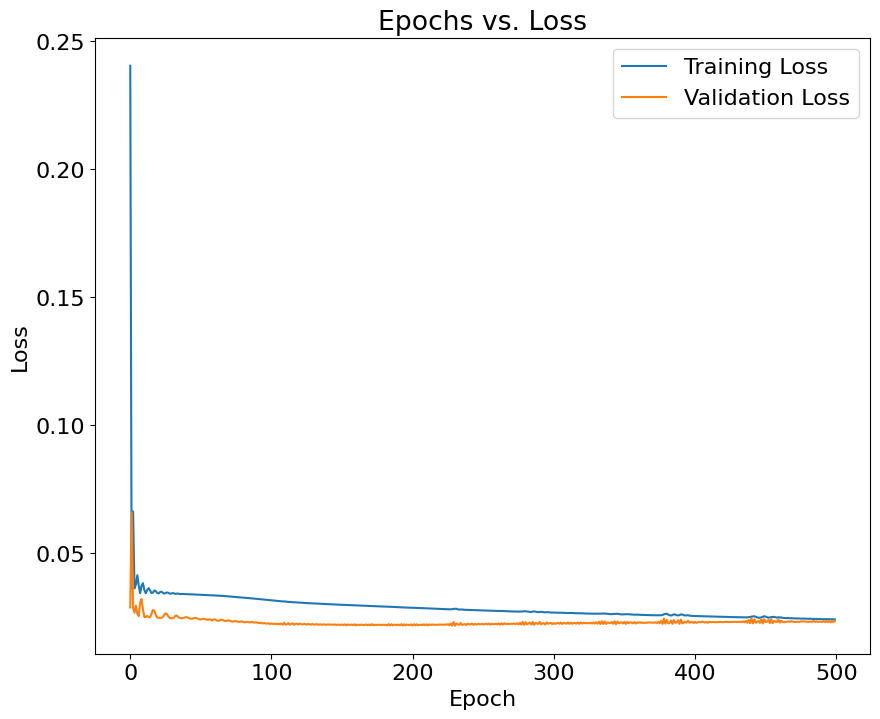

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       10496     
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 1)         1601      
                                                                 
Total params: 85889 (335.50 KB)
Trainable params: 85889 (335.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


'/content/drive/My Drive/CV/Project_SR/srcnn_model.h5'

In [15]:
#Training the model and saving it into both drive and in colab
# data is the low resolution whereas labels are the HR images


import os
from srcnn_model import train
import h5py
import numpy as np
import shutil

# Load the training data and labels from train.h5
with h5py.File('train.h5', 'r') as f:
    data_train = f['data'][:]
    label_train = f['label'][:]

# Print the shape of the data and labels
print('Data shape:', data_train.shape)
print('Label shape:', label_train.shape)

srcnn_model_trained = train(data_train, label_train)#taking data  and label from train.h5 file
#Further split into Train Validation during training the model
print(srcnn_model_trained.summary())

drive_path = "/content/drive/My Drive/CV/Project_SR"

# Copy the saved model file to the desired location in your Google Drive
src_file = '/content/srcnn_model.h5'
dst_file = os.path.join(drive_path, 'srcnn_model.h5')
shutil.copyfile(src_file, dst_file)

## SRCNN vs. FSRCNN:

Fast Super-Resolution Convolutional Neural Network (FSRCNN) is an improvement over SRCNN, proposed by Jo et al. in 2016. It aimed to enhance both the computational efficiency and the reconstruction quality of single-image super-resolution.
<img src="https://cdn-images-1.medium.com/v2/resize:fit:2000/1*auit3UsBTjbnzZoLDEJUUg.png" alt="SRCNN Model Figure" width="120%">

##Key differences:
- Model Architecture: FSRCNN utilizes a shallower network compared to SRCNN, which leads to faster inference times. It replaces the time-consuming iterative operations like deconvolution with more efficient up-sampling layers.
- Parameter Efficiency: FSRCNN reduces the number of learnable parameters compared to SRCNN, making it more computationally efficient.
- Performance: Despite its simplified architecture, FSRCNN achieves comparable or sometimes better performance than SRCNN in terms of PSNR and MSE.

In summary, both SRCNN and FSRCNN are deep learning models designed for single-image super-resolution, with FSRCNN being a more computationally efficient variant. PSNR and MSE are metrics commonly used to evaluate the quality of reconstructed images, where higher PSNR values and lower MSE values indicate better reconstruction quality.

This code snippet is using a function named predict from the srcnn_model.py file to generate a super-resolution (SR) image. Let's break down what each part means:

from srcnn_model import predict: This line imports the predict function from the srcnn_model.py file. This function is likely defined to perform super-resolution prediction using a trained SRCNN (Super-Resolution Convolutional Neural Network) model.

ref, degraded, output = predict('/content/drive/My Drive/CV/Project_SR/LR_Images_Test/baboon.bmp', '/content/srcnn_model.h5'): This line calls the predict function with two arguments: the path to the LR (low-resolution) image to be super-resolved, and the path to the trained SRCNN model file (srcnn_model.h5).

The LR image path is '/content/drive/My Drive/CV/Project_SR/LR_Images_Test/baboon.bmp'.
The SRCNN model file path is '/content/srcnn_model.h5'.
The predict function is expected to return three images:

ref: The original reference image (HR, high-resolution).
degraded: The LR image (low-resolution).
output: The super-resolved image generated by the SRCNN model.
In summary, this code snippet loads a LR image, applies a trained SRCNN model to perform super-resolution, and returns the original reference image, LR image, and the generated super-resolved image.


##Code Description

Importing the img_matrix class from the img_matrix.py file.
Initializing an instance of the img_matrix class as compare.
Calculating image quality scores for two sets of images: degraded images and reconstructed (output) images.
Printing the calculated scores for each set of images.
Displaying the original image (ref), degraded image, and reconstructed image side by side using matplotlib.
Let's break down each part:

compare = img_matrix(): This line initializes an instance of the img_matrix class. This class is likely designed for comparing image quality metrics such as PSNR (Peak Signal-to-Noise Ratio), MSE (Mean Squared Error), and SSIM (Structural Similarity Index Measure).

scores = []: This line initializes an empty list scores to store the calculated image quality scores.

scores.append(compare.compare_images(degraded, ref)): This line calculates and appends the image quality scores (PSNR, MSE, SSIM) between the degraded image (degraded) and the reference image (ref) using the compare_images method of the img_matrix class. The scores are stored in the scores list.

scores.append(compare.compare_images(output, ref)): This line calculates and appends the image quality scores (PSNR, MSE, SSIM) between the reconstructed image (output) and the reference image (ref) using the compare_images method of the img_matrix class. The scores are appended to the scores list.


## Dataset
The datasets used in this project for testing are Set5 and Set14, which are commonly used for testing in Super-Resolution Convolutional Neural Network (SRCNN) models. These datasets contain high-resolution images that are used to evaluate the performance of the model.

For tranining the images we have used the 91 images from the training dataset of the SRCNN model original paper that they have used.

## Method
The method used in this project is the SRCNN model, which is a deep learning model designed for image super-resolution. The model is trained using the Mean Squared Error (MSE) loss function, which measures the average squared differences between the estimated and actual values.

## Experiments
Trained the model with different hyperparameters such as batch size, epochs, etc and the key results of each experiment. This includes code snippets for running the experiments and figures generated as a result of the experiments.




In [17]:
from srcnn_model import predict5, predict14
from img_matrix import img_matrix
import matplotlib.pyplot as plt
import cv2

# List of your image filenames
image_filenames = ['baby_GT.bmp', 'bird_GT.bmp', 'butterfly_GT.bmp', 'head_GT.bmp', 'woman_GT.bmp']

print("Test on Set 5 Data set")

compare = img_matrix()

for filename in image_filenames:
    img_path = os.path.join('/content/drive/My Drive/CV/Project_SR/Set5_LR_Images_Test', filename)
    print(f"Predicting for {filename}")
    ref, degraded, output = predict5(img_path, '/content/srcnn_model.h5')

    # Calculate image quality scores
    scores = []
    scores.append(compare.compare_images(degraded, ref))
    scores.append(compare.compare_images(output, ref))
    print("Bicubic:")
    print('Degraded Image:\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
    print("Bilinear:")
    print('Reconstructed Image:\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

    # Display images
    fig, axs = plt.subplots(1,3, figsize= (20,8))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded')
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [18]:
from srcnn_model import predict5, predict14
from img_matrix import img_matrix
import matplotlib.pyplot as plt
import cv2

# List of your image filenames
image_filenames = ['barbara.bmp', 'coastguard.bmp', 'comic.bmp', 'lenna.bmp', 'flowers.bmp']

print("Test on Set 14 Data set")

compare = img_matrix()

for filename in image_filenames:
    img_path = os.path.join('/content/drive/My Drive/CV/Project_SR/Set14_LR_Images_Test', filename)
    print(f"Predicting for {filename}")
    ref, degraded, output = predict14(img_path, '/content/srcnn_model.h5')

    # Calculate image quality scores
    scores = []
    scores.append(compare.compare_images(degraded, ref))
    scores.append(compare.compare_images(output, ref))
    print("Bicubic:")
    print('Degraded Image:\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
    print("Bilinear:")
    print('Reconstructed Image:\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

    # Display images
    fig, axs = plt.subplots(1,3, figsize= (20,8))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded')
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Conclusion / Future Work
In this project, we delved into the fascinating realm of single-image super-resolution (SISR), with the aim of improving the quality of low-resolution images to higher resolutions. Our main focus was on implementing the Super-Resolution Convolutional Neural Network (SRCNN) architecture, both by using pre-trained models and building the model from scratch.

Initially, we took advantage of a pre-trained SRCNN model obtained from the MarkPrecursor SRCNN GitHub repository to upscale low-resolution images. The results we obtained were quite impressive, showing significant enhancements in image quality, sharpness, and overall detail. This demonstrated the effectiveness of SRCNN in elevating image resolution.

Following this success, we decided to roll up our sleeves and implement the SRCNN architecture from scratch. We meticulously crafted each component of the network, including convolutional layers, activation functions, and loss functions. Despite our best efforts in optimization, our custom SRCNN implementation didn't quite meet our expectations. The resulting high-resolution images appeared noticeably blurry and lacked the crispness seen with the pre-trained model.

Several factors may have contributed to the differences in performance between the pre-trained and custom SRCNN models. The pre-trained model benefited from extensive training on large-scale datasets, which allowed it to capture intricate patterns and details crucial for accurate image reconstruction. On the other hand, our custom implementation may have been hampered by limited training data or less-than-optimal hyperparameter settings, leading to less impressive results.

Furthermore, the nuances of the SRCNN architecture, such as kernel sizes, depth of convolutional layers, and learning rates, greatly influence the model's effectiveness. Even slight deviations in these parameters can have a significant impact on the model's ability to learn meaningful representations and generate high-quality reconstructions.

Moving forward, overcoming these challenges will require thorough exploration and experimentation with hyperparameter tuning, data augmentation techniques, and architectural adjustments. Additionally, exploring advanced super-resolution techniques, such as Generative Adversarial Networks (GANs) or attention mechanisms, holds promise for further enhancing image quality and realism.

In conclusion, while our attempt to implement the SRCNN architecture from scratch provided valuable insights and learnings, the superior performance of the pre-trained model highlights the importance of leveraging established frameworks and methodologies in tackling complex tasks like single-image super-resolution. Future research endeavors should focus on refining our custom implementation and exploring innovative approaches to push the boundaries of image enhancement and reconstruction.